# Olympic medal Dataset analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter

In [2]:
# Reading csv ( without using pd.read_csv()) and convert it in a dictionary
with open('olympic_1896.csv') as file :
    reader = csv.reader(file)  
    header = next(reader)
    dict_olympics = { h:[] for h in header }
    for line in reader :
        for key,value in zip(header,line) :
            dict_olympics[key].append(value)
    
print(dict_olympics.keys())
        
    

dict_keys(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender', 'Event', 'Event_gender', 'Medal'])


In [3]:
# Create dataFrame to Manage easier the data
medals = pd.DataFrame(dict_olympics)
medals.head()

,Athlete,City,Discipline,Edition,Event,Event_gender,Gender,Medal,NOC,Sport
0,"HAJOS, Alfred",Athens,Swimming,1896,100m freestyle,M,Men,Gold,HUN,Aquatics
1,"HERSCHMANN, Otto",Athens,Swimming,1896,100m freestyle,M,Men,Silver,AUT,Aquatics
2,"DRIVAS, Dimitrios",Athens,Swimming,1896,100m freestyle for sailors,M,Men,Bronze,GRE,Aquatics
3,"MALOKINIS, Ioannis",Athens,Swimming,1896,100m freestyle for sailors,M,Men,Gold,GRE,Aquatics
4,"CHASAPIS, Spiridon",Athens,Swimming,1896,100m freestyle for sailors,M,Men,Silver,GRE,Aquatics


In [4]:
#Statistics of the dataframe
medals.describe()

,Athlete,City,Discipline,Edition,Event,Event_gender,Gender,Medal,NOC,Sport
count,29216,29216,29216,29216,29216,29216,29216,29216,29216,29216
unique,21413,22,56,26,577,3,2,3,138,42
top,"LATYNINA, Larisa",Athens,Athletics,2008,football,M,Men,Gold,USA,Aquatics
freq,18,2149,3448,2042,1387,20067,21721,9850,4335,3828


## Top 15 countries ranked by total number of medals

In [5]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']
# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))




USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


## Count medals by type

In [6]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC',values='Athlete',columns='Medal',aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


## Understanding the columns labels

### Selecting types of gender columns

In [7]:
# Select columns: ev_gen
ev_gen =  medals[['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


### Finding possible errors

In [8]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                     Athlete   City  Discipline  Edition  Event  Medal    NOC  \
Event_gender Gender                                                             
M            Men       20067  20067       20067    20067  20067  20067  20067   
W            Men           1      1           1        1      1      1      1   
             Women      7277   7277        7277     7277   7277   7277   7277   
X            Men        1653   1653        1653     1653   1653   1653   1653   
             Women       218    218         218      218    218    218    218   

                     Sport  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


### Locating suspiscious data

In [9]:
# Boolean Series: sus
sus = (medals['Event_gender'] == 'W') & (medals['Gender'] == 'Men')

# The suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

                 Athlete    City Discipline Edition     Event Event_gender  \
23675  CHEPCHUMBA, Joyce  Sydney  Athletics    2000  marathon            W   

      Gender   Medal  NOC      Sport  
23675    Men  Bronze  KEN  Athletics  


## Constructing alternative country rankings

### Which countries won medals in the most distinct sports ?

In [10]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


## Counting USA vs. USSR Cold War Olympic Sports

In [11]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Edition >= '1952') & (medals.Edition <= '1988')

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA','URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)


NOC
URS    21
USA    20
Name: Sport, dtype: int64


### Which country, the USA or the USSR, won the most medals consistently over the Cold War period ?

In [12]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition',columns='NOC',values='Athlete',aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc['1952':'1988', ['USA',
'URS']]
print(cold_war_usa_usr_medals.head(10))

# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())


NOC        USA    URS
Edition              
1952     130.0  117.0
1956     118.0  169.0
1960     112.0  169.0
1964     150.0  174.0
1968     149.0  188.0
1972     155.0  211.0
1976     155.0  285.0
1980       NaN  442.0
1984     333.0    NaN
1988     193.0  294.0
URS    8
USA    2
dtype: int64


## Visualizing USA Medal Counts by Edition

Edition  Medal 
1896     Bronze     2
         Silver     7
         Gold      11
1900     Bronze    14
         Silver    14
Name: Athlete, dtype: int64
Medal    Bronze  Silver  Gold
Edition                      
1896          2       7    11
1900         14      14    27
1904        111     137   146
1908         15      14    34
1912         31      25    45


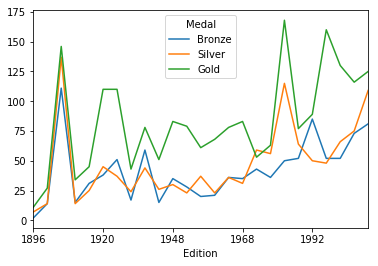

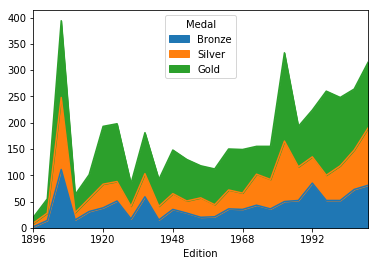

In [13]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal,categories=['Bronze', 'Silver', 'Gold'],ordered=True)

# Create the DataFrame: usa
usa = medals[medals['NOC'] == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
print(usa_medals_by_year.head(5))
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
print(usa_medals_by_year.head(5))

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()

plt.show()



## Counting medals by country/edition in a pivot table

In [60]:
medal_counts = medals.pivot_table(index='Edition',values='Athlete',columns='NOC',aggfunc='count')

In [108]:
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
medal_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1896 to 2008
Columns: 138 entries, AFG to ZZX
dtypes: float64(138)
memory usage: 28.2+ KB


### Computing percentage change in fraction of medals won

In [112]:
totals = medals.groupby(['Edition'])['Medal'].count()

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals,axis='rows')

# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()


### Reshaping for analysis


In [114]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change,id_vars='Edition',value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape , fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped.loc[:,'NOC'] == 'CHN']


(3588, 3) (26, 139)


In [101]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped,hosts,how='inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

NameError: name 'hosts' is not defined

In [102]:
# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot

plt.show()

NameError: name 'influence' is not defined